In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the CSV files
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

In [3]:
# Extract features and labels
X_train = train_data.drop('label', axis=1).values.astype('float32')
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values.astype('float32')
y_test = test_data['label'].values

In [4]:
# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# Reshape the features for CNN input
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [6]:
# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
# Train the model
model.fit(X_train, y_train, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 66s 43ms/step - loss: 0.4008 - accuracy: 0.8572 - val_loss: 0.3182 - val_accuracy: 0.8868
Epoch 2/5
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2683 - accuracy: 0.9019 - val_loss: 0.2789 - val_accuracy: 0.9020
Epoch 3/5
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2193 - accuracy: 0.9196 - val_loss: 0.2539 - val_accuracy: 0.9080
Epoch 4/5
1500/1500 [==============================] - 65s 43ms/step - loss: 0.1857 - accuracy: 0.9326 - val_loss: 0.2526 - val_accuracy: 0.9127
Epoch 5/5
1500/1500 [==============================] - 63s 42ms/step - loss: 0.1528 - accuracy: 0.9436 - val_loss: 0.2609 - val_accuracy: 0.9106


In [10]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

313/313 [==============================] - 4s 11ms/step - loss: 0.2493 - accuracy: 0.9154
Test loss: 0.24933579564094543, Test accuracy: 0.9154000282287598


In [11]:
# Make predictions
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
predictions = model.predict(X_test[:1])
label = labels[np.argmax(predictions)]
print(f'Predicted label: {label}')


1/1 [==============================] - 0s 201ms/step
Predicted label: t_shirt


t_shirt


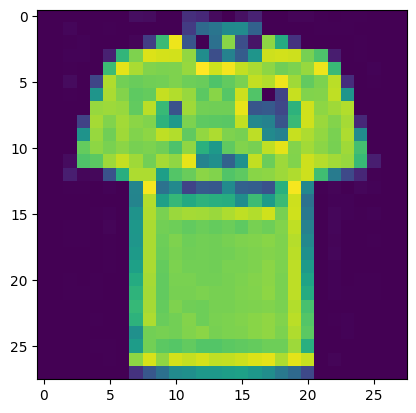

In [16]:
# Plot the image
import matplotlib.pyplot as plt
print(label)
plt.imshow(X_test[:1][0].reshape(28, 28))
plt.show()


In [13]:
# Confusion matrix and classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_classes, y_pred_classes)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=labels))

313/313 [==============================] - 3s 9ms/step

Confusion Matrix:
[[796   0   9   8   0   1 175   0  11   0]
 [  2 985   1   3   1   2   2   0   4   0]
 [ 10   1 846  12  51   1  76   0   3   0]
 [ 11   9   2 923  23   0  26   0   6   0]
 [  3   0  39  16 864   0  75   0   3   0]
 [  0   1   0   0   0 979   0   9   1  10]
 [ 62   1  27  16  27   0 854   0  13   0]
 [  0   0   0   0   0  11   0 957   0  32]
 [  1   0   2   1   1   4   4   2 985   0]
 [  0   0   0   0   0   6   0  27   2 965]]

Classification Report:
              precision    recall  f1-score   support

     t_shirt       0.90      0.80      0.84      1000
     trouser       0.99      0.98      0.99      1000
    pullover       0.91      0.85      0.88      1000
       dress       0.94      0.92      0.93      1000
        coat       0.89      0.86      0.88      1000
      sandal       0.98      0.98      0.98      1000
       shirt       0.70      0.85      0.77      1000
     sneaker       0.96      0.96     

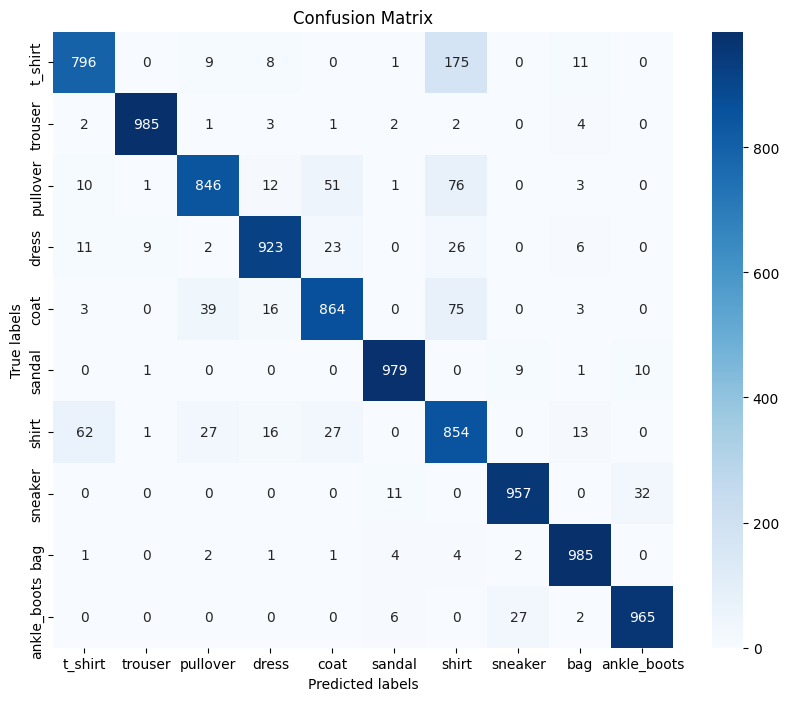

In [14]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()